In [1]:
# Here I want to implement the metropolis algorithm, as well as extend the project to 2 dimensions

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Setting Constants

#position boundaries
x_0 = 0
y_0 = 0
x_endpoints = np.linspace(-2, 2, 201)
y_endpoints = np.linspace(-2, 2, 201)

#time boundaries
t_i = 0
t_f = 6

#other constants
mass = 1
steps = 50
numb_paths = 1000

#array of times
times = np.linspace(t_i, t_f, steps)
dt = times[1] - times[0]
print(x_endpoints)

[-2.   -1.98 -1.96 -1.94 -1.92 -1.9  -1.88 -1.86 -1.84 -1.82 -1.8  -1.78
 -1.76 -1.74 -1.72 -1.7  -1.68 -1.66 -1.64 -1.62 -1.6  -1.58 -1.56 -1.54
 -1.52 -1.5  -1.48 -1.46 -1.44 -1.42 -1.4  -1.38 -1.36 -1.34 -1.32 -1.3
 -1.28 -1.26 -1.24 -1.22 -1.2  -1.18 -1.16 -1.14 -1.12 -1.1  -1.08 -1.06
 -1.04 -1.02 -1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82
 -0.8  -0.78 -0.76 -0.74 -0.72 -0.7  -0.68 -0.66 -0.64 -0.62 -0.6  -0.58
 -0.56 -0.54 -0.52 -0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34
 -0.32 -0.3  -0.28 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1
 -0.08 -0.06 -0.04 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14
  0.16  0.18  0.2   0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38
  0.4   0.42  0.44  0.46  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62
  0.64  0.66  0.68  0.7   0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86
  0.88  0.9   0.92  0.94  0.96  0.98  1.    1.02  1.04  1.06  1.08  1.1
  1.12  1.14  1.16  1.18  1.2   1.22  1.24  1.26  1.28

In [26]:
#Basic Path function and action integral
#Creating the position generating function

def Pos_Gen(x0, xN, Steps, noise_scale=0.05):  #Generates smooth paths with noise
    xs = np.linspace(x0, xN, Steps)
    noise = np.random.normal(0, noise_scale, size=Steps)
    noise[0] = 0.0
    noise[-1] = 0.0
    return xs + noise

In [71]:
#Creating function to evaluate the action integral for a path

def action_harmonic(positions, times, mass, potential):
    #Input Validation
    if type(positions) != np.ndarray:
        raise TypeError("WARNING: position input is not a numpy array")
    if type(times) != np.ndarray:
        raise TypeError("WARNING: time input is not a numpy array")

    #Calculating the action using discrete steps and straight line approx
    S = 0
    for i in range(len(times) - 1):
        dt = times[i + 1] - times[i]
        dx = positions[i + 1] - positions[i]

        S += (mass / (2 * dt)) * dx**2
        S += dt * potential(0.5 * (positions[i] + positions[i + 1]))

    return S

In [72]:
# defining the x and y potentials

def x_potential(x):
    return 0.5*x**2

def y_potential(y):
    return 0.25*(y**2-1)**2

In [77]:
# Generating Paths and calculating weight of each path for x
paths_x = []
weights_x = []
x_end = []

paths_y =[]
weights_y =[]
y_end = []

for xN in x_endpoints:
    for _ in range(numb_paths):
        p = Pos_Gen(x_0, xN, steps)
        S = action_harmonic(p, times, mass, x_potential)
        w = np.exp(-S)
        paths_x.append(p)
        weights_x.append(w)
        x_end.append(xN)

paths_x = np.array(paths_x)
weights_x = np.array(weights_x)
x_end = np.array(x_end)

print(paths_x[0])
print(len(paths_x))
print(paths_x[1001])
# Finding the groundstate wave function of the path
x_bins = np.linspace(-2, 2, 201)

pdf_unnormalised_x, bin_edges_x = np.histogram(x_end, bins=x_bins, weights=weights_x)
x_centres = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])
dx = np.diff(x_bins)[0]


area = np.sum(pdf_unnormalised_x * dx)
pdf_x = pdf_unnormalised_x / (area)

# --- Analytic PDF for comparison ---
phi_sq_analytic = (1 / np.sqrt(np.pi)) * np.exp(-x_centres ** 2)
phi_sq_analytic /= np.sum(phi_sq_analytic * dx)  # normalize area to 1

[ 0.         -0.02275713 -0.07104019 -0.15722068 -0.14427704 -0.14209347
 -0.23308936 -0.29887618 -0.36260745 -0.40894494 -0.4529922  -0.5537517
 -0.49272737 -0.5335732  -0.5818892  -0.54860636 -0.69740158 -0.64506793
 -0.78727251 -0.78200801 -0.87260265 -0.89544342 -0.87727816 -0.93823207
 -0.98025955 -0.99710942 -1.06412548 -1.158298   -1.20802922 -1.23174679
 -1.30349174 -1.29224718 -1.26359641 -1.35610807 -1.45151427 -1.37141471
 -1.43136404 -1.53675218 -1.5088198  -1.52723977 -1.72994612 -1.64580627
 -1.81503221 -1.71099098 -1.82500653 -1.78123618 -1.84515564 -1.85209432
 -2.03324358 -2.        ]
201000
[ 0.         -0.00573156 -0.09148936 -0.08292483 -0.1549399  -0.14153118
 -0.23843426 -0.28934461 -0.33243013 -0.42578531 -0.40590049 -0.37299762
 -0.42206736 -0.55845108 -0.59605538 -0.58477378 -0.64218575 -0.6712323
 -0.72750433 -0.79417793 -0.79319754 -0.82153382 -0.93668557 -0.91565034
 -1.0852016  -0.97260446 -1.12701953 -1.06208297 -1.0400045  -1.16711763
 -1.20758203 -1.2896

Numerical PDF area: 1.00000
Analytic PDF area: 1.00000


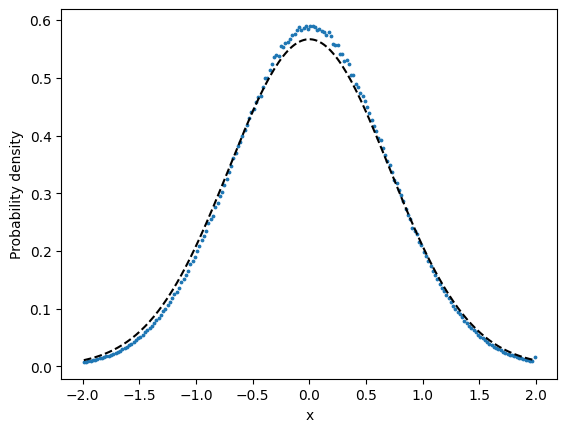

In [78]:
# --- Check areas ---
wavefunction_laptop = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\wavefunction.svg"
wavefunction_pc = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\Summative_Wavefunction.svg"

print(f"Numerical PDF area: {np.sum(pdf_x * dx):.5f}")
print(f"Analytic PDF area: {np.sum(phi_sq_analytic * dx):.5f}")
save_path_wavefunction = wavefunction_laptop

plt.figure(1)
plt.scatter(x_centres, pdf_x, label='Path integral estimate', s=3)
plt.plot(x_centres, phi_sq_analytic, 'k--', label=r'Analytic $|\phi_0(x)|^2$')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.savefig(save_path_wavefunction, bbox_inches='tight', format='svg')
plt.show()


In [82]:
#repeating for y
paths_y =[]
weights_y =[]
y_end = []

for yN in y_endpoints:
    for _ in range(numb_paths):
        p = Pos_Gen(y_0, yN, steps)
        S = action_harmonic(p, times, mass, y_potential)
        w = np.exp(-S)
        paths_y.append(p)
        weights_y.append(w)
        y_end.append(p[len(p)//2])


paths_y = np.array(paths_y)
weights_y = np.array(weights_y)
y_end = np.array(y_end)

print(paths_y[0])
print(len(paths_y))
print(paths_y[1001])
# Finding the groundstate wave function of the path
y_bins = np.linspace(-2, 2, 201)

pdf_unnormalised_y, bin_edges_y = np.histogram(y_end, bins=y_bins, weights=weights_y)
y_centres = 0.5 * (bin_edges_y[1:] + bin_edges_y[:-1])
dy = np.diff(y_bins)[0]


area = np.sum(pdf_unnormalised_y * dy)
pdf_y = pdf_unnormalised_y / (area)

[ 0.          0.06348167 -0.07656405 -0.11390517 -0.20582193 -0.12284655
 -0.29495404 -0.23900692 -0.37598539 -0.32633138 -0.37823981 -0.4533972
 -0.42185263 -0.59480351 -0.5869503  -0.52328756 -0.6395666  -0.59526813
 -0.66438371 -0.74526847 -0.8304222  -0.79731925 -0.8751264  -0.9804612
 -1.00643148 -0.98567954 -1.0381472  -1.09468675 -1.06748151 -1.11920633
 -1.21115563 -1.26545028 -1.29137203 -1.3858954  -1.4439132  -1.42222016
 -1.50531901 -1.61698975 -1.54064796 -1.57451934 -1.67984316 -1.70847986
 -1.82082541 -1.73189676 -1.81420752 -1.82247144 -1.91341957 -1.95312672
 -2.02376888 -2.        ]
201000
[ 0.         -0.11124616 -0.11584679 -0.13350608 -0.18549558 -0.24264533
 -0.36932582 -0.31920119 -0.44342745 -0.31764785 -0.37176481 -0.4174142
 -0.56497558 -0.48972028 -0.57038639 -0.55057239 -0.57854595 -0.67927331
 -0.70246454 -0.76649274 -0.85959194 -0.85574273 -0.86369398 -0.98855561
 -0.97920936 -1.06682565 -1.00095219 -1.09826866 -1.13980358 -1.241201
 -1.27368705 -1.1896484

1.1974443820323892
1.0


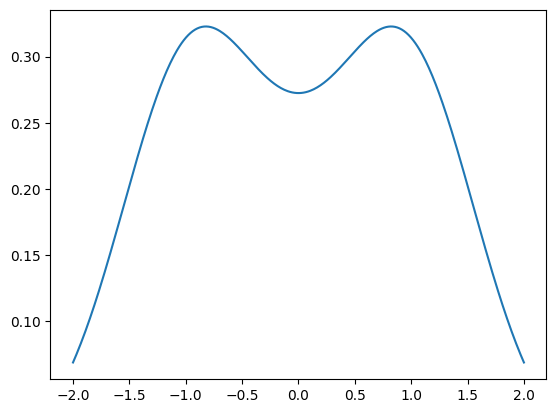

In [83]:
vary = np.linspace(-2, 2, 400)
dv = np.diff(vary)[0]
omega = np.sqrt(2)  # harmonic approximation near minima
# Gaussian around each well
psi_left = (omega/np.pi)**0.25 * np.exp(-0.5*omega*(vary+1)**2)
psi_right = (omega/np.pi)**0.25 * np.exp(-0.5*omega*(vary-1)**2)
# Symmetric ground state
psi0 = (psi_left + psi_right)/np.sqrt(2)
pdf_vary = np.abs(psi0)**2
area = np.sum(pdf_vary * dv)
print(area)
pdf_vary = pdf_vary/(area)  # normalize
print(np.sum(pdf_vary * dv))
plt.plot(vary, pdf_vary)

Numerical PDF area: 1.00000
Analytic PDF area: 1.00000


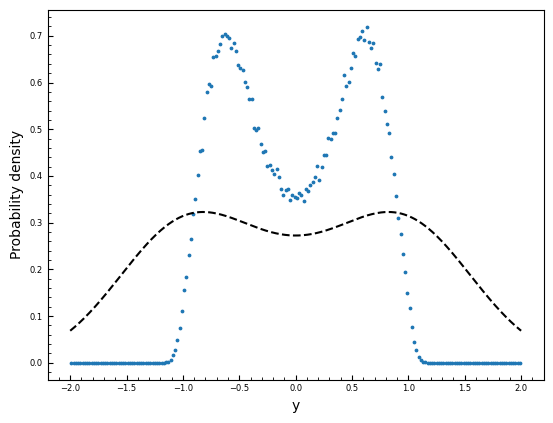

In [84]:
# --- Check areas ---
summative_wavefunction_laptop = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\Summative_Wavefunction.svg"
# summative_wavefunction_pc =

save_path_swf = summative_wavefunction_laptop

print(f"Numerical PDF area: {np.sum(pdf_y * dy):.5f}")
print(f"Analytic PDF area: {np.sum(pdf_vary * dv):.5f}")

plt.figure(1)
plt.scatter(y_centres, pdf_y, label='Path integral estimate', s=3)
plt.plot(vary, pdf_vary, 'k--', label=r'Analytic $|\phi_0(x)|^2$')
plt.xlabel('y')
plt.ylabel('Probability density')

plt.minorticks_on()
plt.tick_params(axis = 'both',which = 'major', direction = 'in')
plt.tick_params(axis = 'both',which = 'minor', direction = 'in')
plt.tick_params(which = 'major', labelsize = 6)
plt.tick_params(which = 'minor', labelsize = 3)

plt.savefig(save_path_swf, bbox_inches='tight', format='svg')
plt.show()

In [20]:
#Now seeking to produce the 3-D plot for x and y

X,Y = np.meshgrid(x_centres, y_centres)

PDF = np.outer(pdf_y, pdf_x)

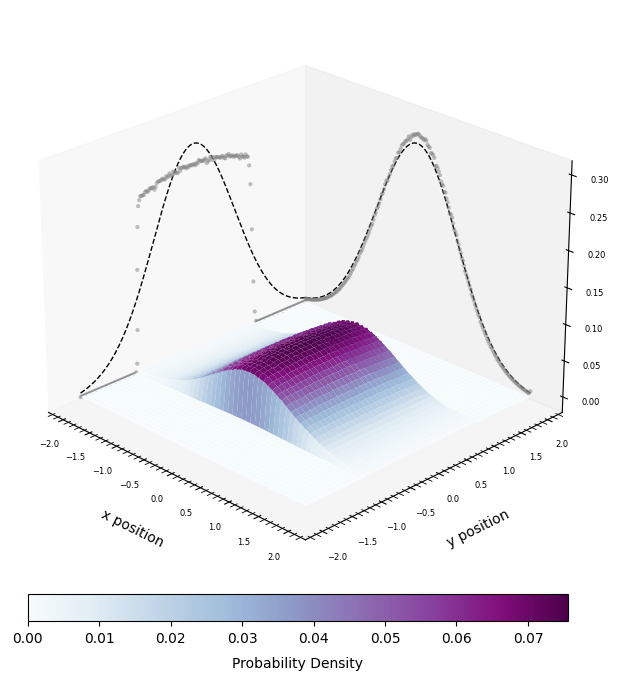

In [22]:
save_path_3d = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\wavefunction_3D.svg"

fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')
fig.subplots_adjust(left=0)  # leave extra space

surf = ax.plot_surface(-X, Y, PDF, cmap='BuPu', antialiased=True, linewidth=0)


cbar = fig.colorbar(surf, ax=ax, shrink=0.7, pad=0.02, orientation = 'horizontal')
cbar.ax.set_position([0.1, 0.2, 0.7, 0.03])  # ([L,B,W,H])
cbar.set_label("Probability Density", labelpad=8)


ax.set_xlabel("x position", labelpad=10)
ax.set_ylabel("y position", labelpad=10)

ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$|\psi(x,y)|^2$", labelpad=12, rotation=0)

ax.view_init(elev=25, azim = -45)

ax.grid(False)

ax.minorticks_on()
ax.tick_params(axis = 'both',which = 'major', direction = 'in')
ax.tick_params(axis = 'both',which = 'minor', direction = 'in')
ax.tick_params(which = 'major', labelsize = 6)
ax.tick_params(which = 'minor', labelsize = 3)

# --- X-PDF projection onto the back Y-wall ---
Y_wall = np.full_like(x_centres, np.max(y_centres))
ax.scatter(x_centres, Y_wall, pdf_x, color="grey", linewidth=2, label="x-PDF projection", s = 1, alpha = 0.5)
ax.plot(x_centres, Y_wall, phi_sq_analytic, color="black", linewidth=1, label="x-PDF projection", linestyle = "--")

# --- Y-PDF projection onto the left X-wall ---
X_wall = np.full_like(y_centres, np.min(x_centres))
ax.scatter(X_wall, y_centres, pdf_y, color="grey", linewidth=2, label="y-PDF projection", s = 1, alpha = 0.5)
ax.plot(X_wall, y_centres, phi_sq_analytic, color="black", linewidth=1, label="y-PDF projection", linestyle = "--")

plt.savefig(save_path_3d,bbox_inches = 'tight', format='svg')
plt.show()